In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import numba as nb
import cython as cy
import scipy
import const 
from scipy.special import gamma
from scipy.special import kv
from scipy import *
from scipy.integrate import odeint
import math as m
import mpmath

In [13]:
import time

import scipy.special

K1p = lambda x: mpmath.besselk(1,x)
K2p = lambda x: mpmath.besselk(2,x)
K3p = lambda x: mpmath.besselk(3,x)
#les fonctions vectorisées ne fonctionnent pas du tout avec la librairiue mpmaths
test = np.linspace(0.1,6,500)
def test1():
    ans  = []
    for k in range (500):
        ans.append(mpmath.besselk(1,test[k]))
    return np.array(ans)

def test2():
    return scipy.special.kv(1,test)





In [14]:
start_time1 = time.time()
test1()
end_time1 = time.time()
execution_time1 = end_time1 - start_time1
start_time2 = time.time()
test2()
end_time2 = time.time()
execution_time2 = end_time2 - start_time2


print(f"Temps d'exécution de mpmath: {execution_time1} secondes")
print(f"Temps d'exécution de scipy: {execution_time2} secondes")

Temps d'exécution de mpmath: 1.3295042514801025 secondes
Temps d'exécution de scipy: 0.01689887046813965 secondes


Le Benchmark est sans équivoque, l'utilisation de la librairie mpmath nous fait perdre un temps non négligeable. On va définir avec les valeurs asymptotiques le rapport des fonctions de bessel, et plus précisément de leur rapport

In [16]:

def K1(x) :
    return kv(1, x)

def K2(x) :
    return kv(2, x)

def K3(x) :
    return kv(3, x)



def f1(x):
    if x < 650:
        return K3(x)/K2(x)
    else :
        return 1 + 2.5/x



def f2(x):
    if x < 650:
        return K2(x)/(3*K3(x) + K1(x) - 4*K2(x))
    else: 
        return x/(3 + np.power(x,2) - 4*x)
    



'\ndef f1(x):\n    if x < 75:\n        return K3(x)/K2(x)\n    else :\n\n\ndef f2(x):\n    if x < 75 :\n        return K2(x)/(3*K3(x) + K1(x) - 4*K2(x))\n    else: \n        \n'

C:\Users\quent\AppData\Local\Temp\ipykernel_19164\3775527997.py:3: RuntimeWarning: invalid value encountered in divide
  return K3(x)/K2(x)


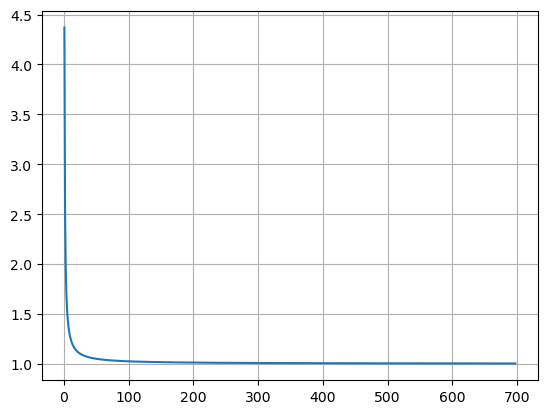

In [26]:
test_1 =np.linspace(1,900,900)
def ftest(x):
    return K3(x)/K2(x)

plt.plot(test_1,ftest(test_1))
plt.grid()

C:\Users\quent\AppData\Local\Temp\ipykernel_19164\1451567042.py:3: RuntimeWarning: invalid value encountered in divide
  return K2(x)/(3*K3(x) + K1(x) - 4*K2(x))


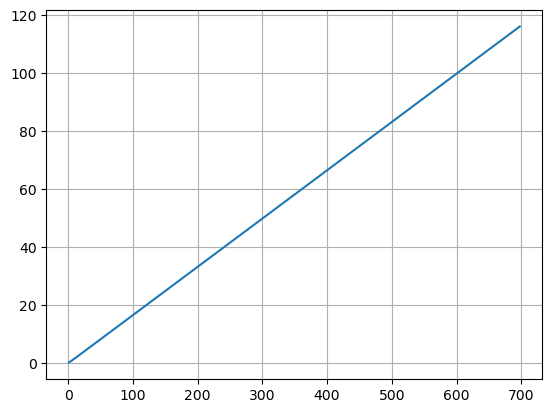

In [27]:
test_2 = np.linspace(1,800,900)
def ftest1(x):
    return K2(x)/(3*K3(x) + K1(x) - 4*K2(x))

plt.plot(test_2,ftest1(test_2))
plt.grid()